# Bayesian NNs

# Resources

Nice Examples:
1. https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/DL2/Bayesian_Neural_Networks/dl2_bnn_tut1_students_with_answers.html
2. https://towardsdatascience.com/from-theory-to-practice-with-bayesian-neural-network-using-python-9262b611b825 


# Data Import an Preprocessing

In [126]:
import pandas as pd
import math as m

In [127]:
df=pd.read_csv("TestData\\801_CFB_xy.csv")
df

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,...,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,0,0,17759.517822,3061.606158,983.149177,300.745090,3676.266330,24.675827,23.781926,21.729474,...,8974.182617,-907.522339,eta_1_x,0.0,0.406654,106.753929,8484.590820,-907.522339,eta_3_top,220.0
1,1,1,10325.767600,10229.047192,473.264468,974.310980,3157.662230,29.773806,21.376408,14.730253,...,217.381439,-425.938019,eta_4_x,0.0,3.562159,6513.389160,4981.675293,-425.938019,eta_3_top,0.0
2,2,2,10144.870523,14049.620640,530.277260,893.697611,2232.556464,14.468021,22.545944,28.424720,...,3385.237305,-483.141510,eta_1_x,0.0,4.539314,13797.252930,1203.868408,-483.141510,eta_3_bot,0.0
3,3,3,8176.785027,17557.323287,461.572837,455.937849,3516.938971,27.700790,18.783392,16.844916,...,179.975464,-706.834534,eta_4_x,0.0,4.848023,244.879654,3583.050781,-412.986237,eta_3_top,0.0
4,4,4,16079.785426,15247.186093,555.101309,995.176167,4879.409679,22.019897,28.278946,16.066113,...,7813.263672,-507.858643,eta_1_x,0.0,0.162081,11085.274414,8553.537109,-507.858643,eta_3_top,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,878,878,6647.718281,8169.609306,330.376650,1175.851905,3585.544763,28.879061,15.474834,11.187786,...,5281.069824,-275.313873,eta_4_x,0.0,4.094101,189.908569,2539.354980,-275.313873,eta_3_top,0.0
879,879,879,12760.166401,12317.894300,821.755672,1134.605019,3235.245717,15.563793,20.543661,13.970697,...,10112.710938,-774.117676,eta_4_x,0.0,3.881837,429.507843,11220.194336,-774.117676,eta_3_bot,0.0
880,880,880,11063.807765,11015.656132,745.289512,514.318986,3450.207121,11.271720,24.204870,10.144561,...,4929.602051,-701.448975,eta_1_x,0.0,3.515341,256.066986,10328.211914,-1643.250244,eta_3_bot,0.0
881,881,881,13710.270448,18860.235875,592.931113,756.917853,4562.816315,28.268932,22.313218,18.267580,...,6900.465332,-545.496643,eta_1_x,0.0,0.118164,328.814941,6052.887695,-545.496643,eta_3_top,192.0


In [128]:


# here define range you are interest in
lower_bound=0
upper_bound=5

#filter
mask=(df['eta_min_c']>lower_bound) & (df['eta_min_c']<=upper_bound) & (df['eta_min_s']>lower_bound) & (df['eta_min_s']<=upper_bound)
df_filtered=df[mask]
df_filtered

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,...,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,0,0,17759.517822,3061.606158,983.149177,300.745090,3676.266330,24.675827,23.781926,21.729474,...,8974.182617,-907.522339,eta_1_x,0.0,0.406654,106.753929,8484.590820,-907.522339,eta_3_top,220.0
1,1,1,10325.767600,10229.047192,473.264468,974.310980,3157.662230,29.773806,21.376408,14.730253,...,217.381439,-425.938019,eta_4_x,0.0,3.562159,6513.389160,4981.675293,-425.938019,eta_3_top,0.0
2,2,2,10144.870523,14049.620640,530.277260,893.697611,2232.556464,14.468021,22.545944,28.424720,...,3385.237305,-483.141510,eta_1_x,0.0,4.539314,13797.252930,1203.868408,-483.141510,eta_3_bot,0.0
3,3,3,8176.785027,17557.323287,461.572837,455.937849,3516.938971,27.700790,18.783392,16.844916,...,179.975464,-706.834534,eta_4_x,0.0,4.848023,244.879654,3583.050781,-412.986237,eta_3_top,0.0
4,4,4,16079.785426,15247.186093,555.101309,995.176167,4879.409679,22.019897,28.278946,16.066113,...,7813.263672,-507.858643,eta_1_x,0.0,0.162081,11085.274414,8553.537109,-507.858643,eta_3_top,212.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,878,878,6647.718281,8169.609306,330.376650,1175.851905,3585.544763,28.879061,15.474834,11.187786,...,5281.069824,-275.313873,eta_4_x,0.0,4.094101,189.908569,2539.354980,-275.313873,eta_3_top,0.0
879,879,879,12760.166401,12317.894300,821.755672,1134.605019,3235.245717,15.563793,20.543661,13.970697,...,10112.710938,-774.117676,eta_4_x,0.0,3.881837,429.507843,11220.194336,-774.117676,eta_3_bot,0.0
880,880,880,11063.807765,11015.656132,745.289512,514.318986,3450.207121,11.271720,24.204870,10.144561,...,4929.602051,-701.448975,eta_1_x,0.0,3.515341,256.066986,10328.211914,-1643.250244,eta_3_bot,0.0
881,881,881,13710.270448,18860.235875,592.931113,756.917853,4562.816315,28.268932,22.313218,18.267580,...,6900.465332,-545.496643,eta_1_x,0.0,0.118164,328.814941,6052.887695,-545.496643,eta_3_top,192.0


In [129]:
df0=pd.read_csv("TestData\\800_CFB_xy.csv")
df1=pd.read_csv("TestData\\801_CFB_xy.csv")
df=pd.concat([df0,df1])
df

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,...,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c,fsu_fac
0,0,0,5896.042103,10183.791863,1189.025419,587.175975,3951.288982,16.589760,24.595059,15.124578,...,-1140.493774,eta_1_x,0.0,41.178042,9817.936523,245.655258,-3552.487061,eta_3_top,0.0,NaN
1,1,1,9783.893188,15582.253981,434.089655,668.134731,4157.543342,10.005126,15.433241,11.179018,...,-394.626953,eta_1_x,52.0,0.007260,14298.742188,4259.643555,-394.626953,eta_3_top,433.0,NaN
2,2,2,3518.491402,15074.031207,509.342737,453.005723,4833.272653,19.790377,21.281638,25.048946,...,-2277.959229,eta_1_x,0.0,7.161654,12240.676758,181.202286,-4713.654297,eta_3_bot,0.0,NaN
3,3,3,8975.183339,9902.815547,562.704986,824.904330,2401.438242,29.192119,13.684717,22.211689,...,-514.815186,eta_4_x,0.0,5.194534,345.297424,5167.886230,-514.815186,eta_3_top,0.0,NaN
4,4,4,16489.511572,7005.396051,327.627067,969.488477,3949.666517,22.085964,26.958668,12.714832,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,878,878,6647.718281,8169.609306,330.376650,1175.851905,3585.544763,28.879061,15.474834,11.187786,...,-275.313873,eta_4_x,0.0,4.094101,189.908569,2539.354980,-275.313873,eta_3_top,0.0,1.08
879,879,879,12760.166401,12317.894300,821.755672,1134.605019,3235.245717,15.563793,20.543661,13.970697,...,-774.117676,eta_4_x,0.0,3.881837,429.507843,11220.194336,-774.117676,eta_3_bot,0.0,1.08
880,880,880,11063.807765,11015.656132,745.289512,514.318986,3450.207121,11.271720,24.204870,10.144561,...,-701.448975,eta_1_x,0.0,3.515341,256.066986,10328.211914,-1643.250244,eta_3_bot,0.0,1.08
881,881,881,13710.270448,18860.235875,592.931113,756.917853,4562.816315,28.268932,22.313218,18.267580,...,-545.496643,eta_1_x,0.0,0.118164,328.814941,6052.887695,-545.496643,eta_3_top,192.0,1.08


In [130]:
# here define range you are interest in
lower_bound=0
upper_bound=5



#filter
mask=(df['eta_min_c']>lower_bound) & (df['eta_min_c']<=upper_bound) & (df['eta_min_s']>lower_bound) & (df['eta_min_s']<=upper_bound)
df_filtered=df[mask]
df_filtered

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,...,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c,fsu_fac
1,1,1,9783.893188,15582.253981,434.089655,668.134731,4157.543342,10.005126,15.433241,11.179018,...,-394.626953,eta_1_x,52.0,0.007260,14298.742188,4259.643555,-394.626953,eta_3_top,433.0,NaN
7,7,7,15716.026452,5842.981302,1193.867846,1091.094161,3191.685199,28.256982,19.142012,28.275417,...,-1416.447144,eta_4_x,0.0,3.812772,407.473236,14127.344727,-2024.544800,eta_3_bot,0.0,NaN
9,9,9,14594.978781,11740.957466,959.721392,692.352449,2073.230610,20.350477,22.551355,28.575311,...,-1499.305664,eta_4_x,0.0,1.437186,409.390778,13602.606445,-2888.370605,eta_3_top,0.0,NaN
10,10,10,14010.424751,6865.412345,1192.311835,520.257875,4378.137504,29.518388,20.734132,10.612500,...,-1144.619385,eta_1_x,0.0,2.965673,6618.770508,13251.715820,-2331.778076,eta_3_bot,0.0,NaN
11,11,11,14421.464595,3782.395993,673.932267,1179.655675,3074.888826,24.183178,12.842121,11.717830,...,-627.454163,eta_4_x,0.0,4.859529,263.773804,1148.783447,-627.454163,eta_3_bot,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,878,878,6647.718281,8169.609306,330.376650,1175.851905,3585.544763,28.879061,15.474834,11.187786,...,-275.313873,eta_4_x,0.0,4.094101,189.908569,2539.354980,-275.313873,eta_3_top,0.0,1.08
879,879,879,12760.166401,12317.894300,821.755672,1134.605019,3235.245717,15.563793,20.543661,13.970697,...,-774.117676,eta_4_x,0.0,3.881837,429.507843,11220.194336,-774.117676,eta_3_bot,0.0,1.08
880,880,880,11063.807765,11015.656132,745.289512,514.318986,3450.207121,11.271720,24.204870,10.144561,...,-701.448975,eta_1_x,0.0,3.515341,256.066986,10328.211914,-1643.250244,eta_3_bot,0.0,1.08
881,881,881,13710.270448,18860.235875,592.931113,756.917853,4562.816315,28.268932,22.313218,18.267580,...,-545.496643,eta_1_x,0.0,0.118164,328.814941,6052.887695,-545.496643,eta_3_top,192.0,1.08


In [131]:
3248/11000

0.2952727272727273

In [132]:
df.columns

Index(['Unnamed: 0', 'ID', 'L', 'b1', 't_p', 't_w', 'h_w', 'd1_plate',
       'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls',
       'fcc', 'fsy', 's', 'beta', 'ecu', 'fsu', 'b2', 'alpha_l', 'l_sec',
       'b_sec1_b1', 'b_sec2_b1', 'b_sec1_b2', 'b_sec2_b2', 'h_S1_3', 'h_S7_9',
       'h_v', 'l_v', 'left_p', 'right_p', 'h_b', 'b_b', 'esu', 'h_G',
       'gamma_E', 'phi_k', 'q_Gl', 'b_Bs', 'Q_k', 'withMPCs', 'offsetmodeling',
       'mesh_size_factor', 'oo', 'uu', 'd3_plate', 'd2_walls', 'd3_walls',
       'eta_min_s', 'x_s', 'y_s', 'z_s', 'Location_s', 'GP_count_s',
       'eta_min_c', 'x_c', 'y_c', 'z_c', 'Location_c', 'GP_count_c',
       'fsu_fac'],
      dtype='object')

# BNN implementation acc. to source 2
https://towardsdatascience.com/from-theory-to-practice-with-bayesian-neural-network-using-python-9262b611b825


In [133]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt

#### Preprocess Data

In [134]:
#x_names = ['L', 'b1',  't_p', 't_w', 'h_w'] #5 important features
x_names = ['L', 'b1',  't_p', 't_w', 'h_w', 'd1_plate', 'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls', 'fcc', 'fsy', 's', 'beta'] # all 16 features
y_names=['eta_min_c']

x_data=df[x_names]
x_tensor=torch.tensor(x_data.values, dtype=torch.float32)

y_data=df[y_names]
y_tensor = torch.tensor(y_data.values,dtype=torch.float32)


x_tensor

tensor([[ 5.8960e+03,  1.0184e+04,  1.1890e+03,  ...,  3.8795e+02,
          8.2077e-01, -7.5295e+00],
        [ 9.7839e+03,  1.5582e+04,  4.3409e+02,  ...,  3.2884e+02,
          6.2210e-01,  3.1590e+01],
        [ 3.5185e+03,  1.5074e+04,  5.0934e+02,  ...,  4.4043e+02,
          8.1841e-01,  2.1790e+01],
        ...,
        [ 1.1064e+04,  1.1016e+04,  7.4529e+02,  ...,  4.2658e+02,
          8.5407e-01, -4.7518e+01],
        [ 1.3710e+04,  1.8860e+04,  5.9293e+02,  ...,  3.2728e+02,
          2.1370e-01, -2.8462e+01],
        [ 1.5555e+04,  3.3654e+03,  5.3867e+02,  ...,  4.2282e+02,
          2.5255e-01, -4.3826e+01]])

In [135]:
# train, test split

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)
#x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)
print(x_train.shape)

print(x_train)
print(y_train)

torch.Size([8706, 16])
tensor([[ 9.6203e+03,  9.1555e+03,  4.5106e+02,  ...,  3.7178e+02,
          5.8207e-01,  2.9748e+01],
        [ 8.8467e+03,  1.4114e+04,  8.5876e+02,  ...,  3.8783e+02,
          3.8083e-01,  3.5631e+01],
        [ 5.6409e+03,  1.3436e+04,  9.9417e+02,  ...,  3.7860e+02,
          5.1997e-01, -4.5425e+01],
        ...,
        [ 1.1583e+04,  1.8034e+04,  2.7901e+02,  ...,  4.3890e+02,
          3.2974e-01,  2.9333e+01],
        [ 1.5804e+04,  1.8943e+04,  7.0222e+02,  ...,  3.2613e+02,
          7.5613e-01,  1.3776e+01],
        [ 2.5752e+03,  6.9678e+03,  9.4653e+02,  ...,  3.9370e+02,
          2.5782e-01,  3.3763e+01]])
tensor([[ 2.0301],
        [15.1942],
        [67.3892],
        ...,
        [ 0.0000],
        [ 2.7834],
        [45.0350]])


In [136]:
from sklearn.preprocessing import MinMaxScaler
import torch

# Convert tensors to numpy arrays
x_train_np = x_train.numpy()
x_val_np = x_val.numpy()

# Initialize the MinMaxScaler and fit it on the training data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_np)

# Scale the validation data using the same scaler
x_val_scaled = scaler.transform(x_val_np)

# Convert the scaled arrays back to tensors
x_train = torch.tensor(x_train_scaled, dtype=torch.float32)
x_val = torch.tensor(x_val_scaled, dtype=torch.float32)

print(x_train)
print(y_train)

tensor([[0.4763, 0.3578, 0.2544,  ..., 0.4794, 0.5923, 0.7906],
        [0.4279, 0.6422, 0.6503,  ..., 0.5845, 0.3488, 0.8483],
        [0.2275, 0.6033, 0.7818,  ..., 0.5241, 0.5172, 0.0530],
        ...,
        [0.5990, 0.8670, 0.0873,  ..., 0.9185, 0.2870, 0.7865],
        [0.8629, 0.9192, 0.4983,  ..., 0.1808, 0.8030, 0.6338],
        [0.0359, 0.2323, 0.7355,  ..., 0.6229, 0.1999, 0.8300]])
tensor([[ 2.0301],
        [15.1942],
        [67.3892],
        ...,
        [ 0.0000],
        [ 2.7834],
        [45.0350]])


### Setup and Train Model

In [137]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=16, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=1)
)


# model = nn.Sequential(
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=1000),
#     nn.ReLU(),
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1000),
#     nn.ReLU(),
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1),
# )

In [138]:

mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [139]:
def weighted_mse_loss(predictions, targets, importance_range=(0, 5), high_weight=10):
    # Calculate the basic MSE loss
    basic_mse = (predictions - targets) ** 2

    # Apply a higher weight to errors within the specified range
    weights = torch.ones_like(targets)
    weights[(targets >= importance_range[0]) & (targets <= importance_range[1])] = high_weight

    # Calculate the weighted MSE loss
    weighted_mse = basic_mse * weights
    return weighted_mse.mean()

In [140]:
#initialize error tracking lists
mse_list=[]
custom_mse_list = []
rmse_list=[]

In [151]:
for step in range(5000):
    pre = model(x_train)

    mse = mse_loss(pre, y_train)
    mse_list.append(mse.item())
    rmse = torch.sqrt(mse)
    rmse_list.append(rmse.item())

    # Custom weighted MSE loss
    custom_mse = weighted_mse_loss(pre, y_train, importance_range=(0, 100), high_weight=10)
    custom_mse_list.append(custom_mse.item())

    kl = kl_loss(model)
    cost = rmse + kl_weight*kl
    cost_custom = custom_mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost_custom.backward()
    optimizer.step()
    
print('- MSE : %2.2f, KL : %2.2f, RMSE: %2.2f, wRMSE: %2.2f' % (mse.item(), kl.item(), rmse.item(), m.sqrt(custom_mse.item())))

- MSE : 37.08, KL : 1.23, RMSE: 6.09, wRMSE: 13.99


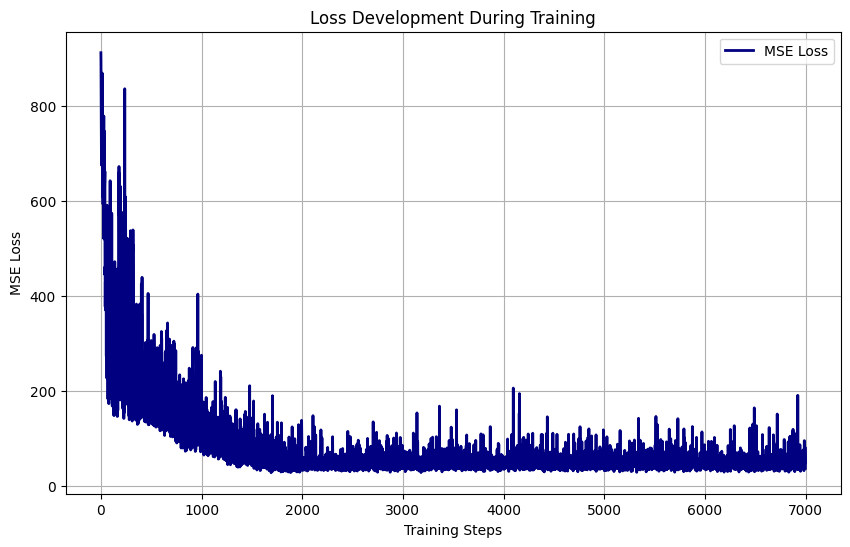

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(mse_list, label='MSE Loss', color='navy', lw=2)
plt.title('Loss Development During Training')
plt.xlabel('Training Steps')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [153]:
## save model

name_training_run='Run3'
#saving just the weights and biases
#torch.save(model.state_dict(), 'trainedModels\\'+name_training_run+'.pth')

#saving the whole model
torch.save(model, 'trainedModels\\'+name_training_run+'.pth')

In [154]:
## load a model
name_training_run='Run3'
model = torch.load('trainedModels\\'+name_training_run+'.pth')
model

Sequential(
  (0): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=16, out_features=200, bias=True)
  (1): ReLU()
  (2): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200, bias=True)
  (3): ReLU()
  (4): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200, bias=True)
  (5): ReLU()
  (6): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200, bias=True)
  (7): ReLU()
  (8): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=1, bias=True)
)

### Model Evaluation

#### On the training data

In [155]:
# predicting 10 000 times 
models_result = np.array([model(x_train).data.numpy() for k in range(1000)])
models_result

array([[[  2.0178955 ],
        [ 24.054056  ],
        [ 98.711685  ],
        ...,
        [  0.89485013],
        [  1.5210524 ],
        [ 77.45728   ]],

       [[  2.6335762 ],
        [ 17.789106  ],
        [ 67.70118   ],
        ...,
        [  0.77924645],
        [  1.3103001 ],
        [ 64.138016  ]],

       [[  3.4992542 ],
        [ 20.24272   ],
        [ 87.5131    ],
        ...,
        [  1.3033934 ],
        [  2.4058614 ],
        [ 53.088882  ]],

       ...,

       [[  2.2224379 ],
        [ 16.631563  ],
        [ 80.68864   ],
        ...,
        [  0.97473454],
        [  1.2105926 ],
        [ 57.96122   ]],

       [[  2.037457  ],
        [ 21.480791  ],
        [ 87.05582   ],
        ...,
        [  0.9223304 ],
        [  1.3704293 ],
        [ 61.92743   ]],

       [[  2.0294392 ],
        [ 23.706955  ],
        [109.93834   ],
        ...,
        [  0.6673786 ],
        [  1.260859  ],
        [ 77.20876   ]]], dtype=float32)

In [156]:
models_result = models_result[:,:,0]    
models_result = models_result.T #transpose--> each row corresponds to the predictions for a single data point across all 10000 iterations
#get mean predictions form each sample
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
#calculate standard derivation of prediction for each sample
std_values = np.array([models_result[i].std() for i in range(len(models_result))])


print('Mean Predictions: ',mean_values)
print('Standard Derivation of Predictions : ',std_values)

Mean Predictions:  [ 2.0631537 18.266394  81.84195   ...  0.7960668  1.2672822 60.190804 ]
Standard Derivation of Predictions :  [ 0.6596376   2.4674175  10.042332   ...  0.13209873  0.32463655
  6.7840505 ]


In [157]:
# calculate the RMSE of all training samples
mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)
mean_values_tensor

#Assuming y_val and y_pred are PyTorch tensors
# Calculate the squared differences
squared_diff = (y_train - mean_values_tensor) ** 2

# Calculate the mean of squared differences
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE
rmse = torch.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse.item())

Root Mean Squared Error (RMSE): 6.1385626792907715


Text(0, 0.5, 'True $\\eta_{min},_{concrete}$')

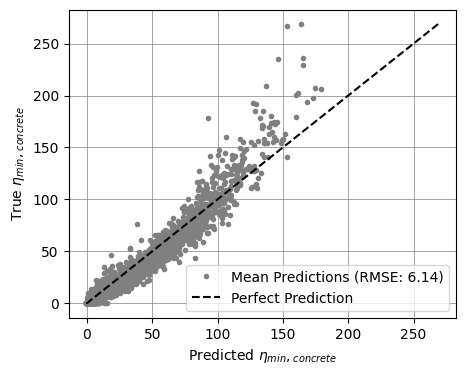

In [158]:
rmse_value=rmse.item()
x=torch.unsqueeze(x_train[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_train.data.numpy()

plt.figure(figsize=(5,4))
plt.plot(y_pred,y_true,'.',color='gray',lw=3,label='Mean Predictions (RMSE: {:.2f})'.format(rmse_value))
plt.grid(color='gray', linestyle='-', linewidth=0.5) 


# Determine the range for the x=y line
line_min = min(y_pred.min(), y_true.min())
line_max = max(y_pred.max(), y_true.max())
plt.plot([line_min, line_max], [line_min, line_max], 'k--', label='Perfect Prediction') 

# plt.ylim((0,5))
# plt.xlim((0,5))


plt.legend()
plt.xlabel('Predicted $\eta_{min},_{concrete}$')
plt.ylabel('True $\eta_{min},_{concrete}$')

In [159]:
# Define the range
lower_bound = 0
upper_bound = 5

# Create a mask for values within the specified range
mask = (y_train >= lower_bound) & (y_train <= upper_bound)

# Apply the mask
filtered_y_train = y_train[mask]
filtered_mean_values = mean_values_tensor[mask]

# Calculate the squared differences for the filtered samples
squared_diff = (filtered_y_train - filtered_mean_values) ** 2

# Calculate the mean of squared differences for the filtered samples
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE for the filtered samples
rmse = torch.sqrt(mean_squared_diff)

# Print RMSE
print("Root Mean Squared Error (RMSE):", rmse.item())

# Print the number of samples within the specified range
print("Number of samples within range:", filtered_y_train.size(0))

Root Mean Squared Error (RMSE): 1.481866478919983
Number of samples within range: 4948


Text(0, 0.5, 'True $\\eta_{min},_{concrete}$')

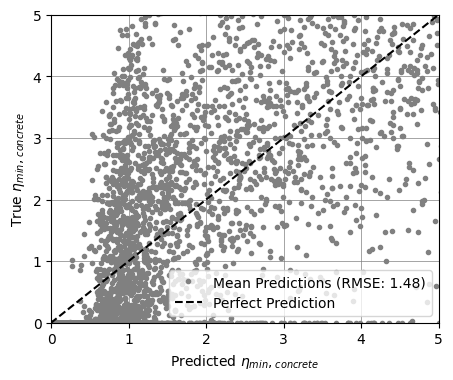

In [162]:
rmse_value=rmse.item()
x=torch.unsqueeze(x_train[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_train.data.numpy()

plt.figure(figsize=(5,4))
plt.plot(y_pred,y_true,'.',color='gray',lw=3,label='Mean Predictions (RMSE: {:.2f})'.format(rmse_value))
plt.grid(color='gray', linestyle='-', linewidth=0.5) 


# Determine the range for the x=y line
line_min = min(y_pred.min(), y_true.min())
line_max = max(y_pred.max(), y_true.max())
plt.plot([line_min, line_max], [line_min, line_max], 'k--', label='Perfect Prediction') 

plt.ylim((0,5))
plt.xlim((0,5))


plt.legend()
plt.xlabel('Predicted $\eta_{min},_{concrete}$')
plt.ylabel('True $\eta_{min},_{concrete}$')

#### on the validation data:

In [163]:
# predicting 10 000 times 
models_result = np.array([model(x_val).data.numpy() for k in range(1000)])
models_result

array([[[ 1.3198894 ],
        [ 0.629625  ],
        [ 0.820607  ],
        ...,
        [ 1.7032583 ],
        [50.83142   ],
        [ 1.945238  ]],

       [[ 1.4762911 ],
        [ 0.52731633],
        [ 0.7207645 ],
        ...,
        [ 1.6652915 ],
        [57.787647  ],
        [ 2.111424  ]],

       [[ 1.2208523 ],
        [ 0.5040754 ],
        [ 0.73855925],
        ...,
        [ 1.4268146 ],
        [69.59101   ],
        [ 2.9849663 ]],

       ...,

       [[ 1.3997538 ],
        [ 0.403203  ],
        [ 0.6421646 ],
        ...,
        [ 1.204493  ],
        [62.675194  ],
        [ 3.283694  ]],

       [[ 1.2282622 ],
        [ 0.43412274],
        [ 0.6163232 ],
        ...,
        [ 1.3473668 ],
        [57.70497   ],
        [ 1.8640755 ]],

       [[ 1.8743852 ],
        [ 0.48077542],
        [ 0.7339626 ],
        ...,
        [ 1.6885408 ],
        [69.42544   ],
        [ 1.7055041 ]]], dtype=float32)

In [164]:
models_result = models_result[:,:,0]    
models_result = models_result.T #transpose--> each row corresponds to the predictions for a single data point across all 10000 iterations
#get mean predictions form each sample
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
#calculate standard derivation of prediction for each sample
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

In [165]:
#Assuming y_val and y_pred are PyTorch tensors

mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)
mean_values_tensor
# Calculate the squared differences
squared_diff = (y_val - mean_values_tensor) ** 2

# Calculate the mean of squared differences
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE
rmse = torch.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse.item())

Root Mean Squared Error (RMSE): 7.73745059967041


In [166]:
# x=torch.unsqueeze(x_val[:, 0], dim=1).data.numpy()
# y_pred=mean_values.reshape(-1,1)
# y_true=y_val.data.numpy()

# plt.figure(figsize=(10,8))
# plt.plot(x,y_pred,'.',color='navy',lw=3,label='Predicted Mean Model')
# #plt.fill_between(x_tensor.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
# #plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
# plt.plot(x,y_true,'.',color='darkorange',markersize=4,label='Test set')
# # plt.plot(x_tensor.data.numpy(),clean_target(x_tensor).data.numpy(),color='green',markersize=4,label='Target function')
# # plt.ylim((-1,20))
# plt.legend()
# plt.xlabel('x')
# plt.ylabel('y')

Text(0, 0.5, 'True $\\eta_{min},_{concrete}$')

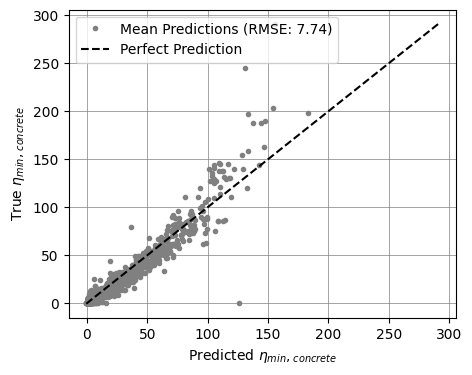

In [167]:
rmse_value=rmse.item()
x=torch.unsqueeze(x_val[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_val.data.numpy()

plt.figure(figsize=(5,4))
plt.plot(y_pred,y_true,'.',color='gray',lw=3,label='Mean Predictions (RMSE: {:.2f})'.format(rmse_value))
plt.grid(color='gray', linestyle='-', linewidth=0.5) 


# Determine the range for the x=y line
line_min = min(y_pred.min(), y_true.min())
line_max = max(y_pred.max(), y_true.max())
plt.plot([line_min, line_max], [line_min, line_max], 'k--', label='Perfect Prediction') 

# plt.ylim((0,5))
# plt.xlim((0,5))


plt.legend()
plt.xlabel('Predicted $\eta_{min},_{concrete}$')
plt.ylabel('True $\eta_{min},_{concrete}$')

In [168]:
# Define the range
lower_bound = 0.5
upper_bound = 5

# Create a mask for values within the specified range
mask = (y_val >= lower_bound) & (y_val <= upper_bound)

# Apply the mask
filtered_y_val = y_val[mask]
filtered_mean_values = mean_values_tensor[mask]

# Calculate the squared differences for the filtered samples
squared_diff = (filtered_y_val - filtered_mean_values) ** 2

# Calculate the mean of squared differences for the filtered samples
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE for the filtered samples
rmse = torch.sqrt(mean_squared_diff)

# Print RMSE
print("Root Mean Squared Error (RMSE):", rmse.item())

# Print the number of samples within the specified range
print("Number of samples within range:", filtered_y_val.size(0))

Root Mean Squared Error (RMSE): 1.948478102684021
Number of samples within range: 560


Text(0, 0.5, 'True $\\eta_{min},_{concrete}$')

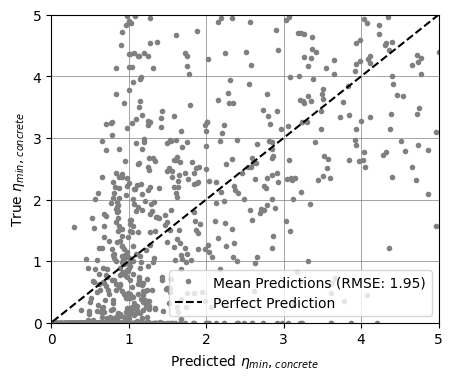

In [169]:
rmse_value=rmse.item()
x=torch.unsqueeze(x_val[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_val.data.numpy()

plt.figure(figsize=(5,4))
plt.plot(y_pred,y_true,'.',color='gray',lw=3,label='Mean Predictions (RMSE: {:.2f})'.format(rmse_value))
plt.grid(color='gray', linestyle='-', linewidth=0.5) 


# Determine the range for the x=y line
line_min = min(y_pred.min(), y_true.min())
line_max = max(y_pred.max(), y_true.max())
plt.plot([line_min, line_max], [line_min, line_max], 'k--', label='Perfect Prediction') 

plt.ylim((0,5))
plt.xlim((0,5))


plt.legend()
plt.xlabel('Predicted $\eta_{min},_{concrete}$')
plt.ylabel('True $\eta_{min},_{concrete}$')

#### on 1D parameter studies

##### L-Parameter study

In [97]:
#import validation data
df_1d_L=pd.read_csv("TestData\\601_CFB_xy.csv")

In [98]:
x_data_1d=df_1d_L[x_names]
x_tensor_1d=torch.tensor(x_data_1d.values, dtype=torch.float32)

y_data_1d=df_1d_L[y_names]
y_tensor_1d = torch.tensor(y_data_1d.values,dtype=torch.float32)


x_data_1d.head()

,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,d4_walls,s_walls,fcc,fsy,s,beta
0,2000.000000,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,0.18179,5
1,2326.530612,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,0.18179,5
2,2653.061224,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,0.18179,5
3,2979.591837,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,0.18179,5
4,3306.122449,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,0.18179,5


In [99]:
## normalise imoirted data
# Convert tensors to numpy arrays
x_data_1d_to_scale = x_tensor_1d.numpy()


# Scale the validation data using the same scaler as for fitted for the trainings set
x_data_1d_scaled = scaler.transform(x_data_1d_to_scale)

# Convert the scaled arrays back to tensors
x_tensor_1d_scaled = torch.tensor(x_data_1d_scaled, dtype=torch.float32)


print(x_tensor_1d_scaled)
print(y_tensor_1d)

tensor([[-5.7578e-05,  3.9016e-01,  2.0479e-01,  2.0158e-01,  1.9776e-01,
          6.8479e-01,  6.9439e-01,  1.1293e-01,  2.5193e-01,  2.0553e-01,
          7.0493e-01,  2.6273e-01, -4.6857e-01,  5.9866e-01,  1.0792e-01,
          5.4773e-01],
        [ 2.0355e-02,  3.9016e-01,  2.0479e-01,  2.0158e-01,  1.9776e-01,
          6.8479e-01,  6.9439e-01,  1.1293e-01,  2.5193e-01,  2.0553e-01,
          7.0493e-01,  2.6273e-01, -4.6857e-01,  5.9866e-01,  1.0792e-01,
          5.4773e-01],
        [ 4.0767e-02,  3.9016e-01,  2.0479e-01,  2.0158e-01,  1.9776e-01,
          6.8479e-01,  6.9439e-01,  1.1293e-01,  2.5193e-01,  2.0553e-01,
          7.0493e-01,  2.6273e-01, -4.6857e-01,  5.9866e-01,  1.0792e-01,
          5.4773e-01],
        [ 6.1179e-02,  3.9016e-01,  2.0479e-01,  2.0158e-01,  1.9776e-01,
          6.8479e-01,  6.9439e-01,  1.1293e-01,  2.5193e-01,  2.0553e-01,
          7.0493e-01,  2.6273e-01, -4.6857e-01,  5.9866e-01,  1.0792e-01,
          5.4773e-01],
        [ 8.1592e-02

In [100]:
from model import predict
mean_values, std_values=predict(model=model, x_scaled=x_tensor_1d_scaled, n=10000)

In [101]:
from model import RMSE

mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)

rmse=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, verbalize=True)
rmse_range=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, y_range=(0,5), verbalize=True)


Root Mean Squared Error (RMSE): 3.1285507678985596
A range is provided.
Root Mean Squared Error (RMSE): 1.9849852323532104


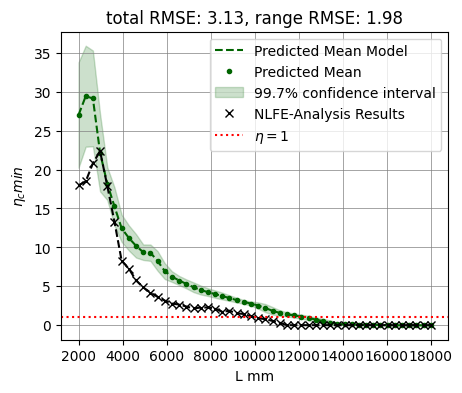

In [102]:
from plotting import single_para_strudy_perf

#x=torch.unsqueeze(x_tensor_1d[:, 2], dim=1).data.numpy()
variable='L'
unit='mm'
x=np.array(x_data_1d[variable]).reshape(-1,1)
y_pred=mean_values.reshape(-1,1)
y_true=y_tensor_1d.data.numpy()
y_std=std_values.reshape(-1,1)

single_para_strudy_perf(x, y_pred, y_true, y_std, variable=variable, unit=unit, rmse=rmse.item(),rmse_range=rmse_range.item())

In [103]:
# x=torch.unsqueeze(x_tensor_1d[:, 0], dim=1).data.numpy()
# y_pred=mean_values.reshape(-1,1)
# y_true=y_tensor_1d.data.numpy()

# plt.figure(figsize=(5,4))
# plt.plot(x,y_pred, linestyle='--',color='darkgreen',lw=1.5,label='Predicted Mean Model')
# plt.plot(x,y_pred, '.',color='darkgreen',markersize=6,label='Predicted Mean')
# plt.fill_between(x_tensor_1d.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='darkgreen',label='99.7% confidence interval')
# #plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
# plt.plot(x,y_true,linestyle='--',color='black',lw=1.5)
# plt.plot(x,y_true,'x',color='black',markersize=6,label='NLFE-Analysis Results')

# # Add a red dotted line at y=1
# plt.axhline(y=1, color='r', linestyle=':', label='$\eta = 1$')
# # plt.plot(x_tensor.data.numpy(),clean_target(x_tensor).data.numpy(),color='green',markersize=4,label='Target function')
# plt.ylim((0,20))
# plt.grid(color='gray', linestyle='-', linewidth=0.5) 
# plt.legend()
# plt.xlabel('L [mm]')
# plt.title('total RMSE: {:.2f}, range RMSE: {:.2f}'.format(rmse.item(),rmse_range.item()))
# plt.ylabel('$\eta_{c} min$')

##### t_p-Parameter study

In [104]:
#import validation data
df_1d_tp=pd.read_csv("TestData\\602_CFB_xy.csv")

x_data_1d=df_1d_tp[x_names]
x_tensor_1d=torch.tensor(x_data_1d.values, dtype=torch.float32)

y_data_1d=df_1d_tp[y_names]
y_tensor_1d = torch.tensor(y_data_1d.values,dtype=torch.float32)


x_tensor_1d

tensor([[5.8000e+03, 9.7200e+03, 2.0000e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 3.9000e+02, 1.8179e-01, 5.0000e+00],
        [5.8000e+03, 9.7200e+03, 2.2041e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 3.9000e+02, 1.8179e-01, 5.0000e+00],
        [5.8000e+03, 9.7200e+03, 2.4082e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 3.9000e+02, 1.8179e-01, 5.0000e+00],
        [5.8000e+03, 9.7200e+03, 2.6122e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 3.9000e+02, 1.8179e-01, 5.0000e+00],
        [5.8000e+03, 9.7200e+03, 2.8163e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000

In [105]:
## normalise imoirted data
# Convert tensors to numpy arrays
x_data_1d_to_scale = x_tensor_1d.numpy()


# Scale the validation data using the same scaler as for fitted for the trainings set
x_data_1d_scaled = scaler.transform(x_data_1d_to_scale)

# Convert the scaled arrays back to tensors
x_tensor_1d_scaled = torch.tensor(x_data_1d_scaled, dtype=torch.float32)


print(x_tensor_1d_scaled)
print(y_tensor_1d)

tensor([[ 0.2375,  0.3902,  0.0106,  0.2016,  0.1978,  0.6848,  0.6944,  0.1129,
          0.2519,  0.2055,  0.7049,  0.2627, -0.4686,  0.5987,  0.1079,  0.5477],
        [ 0.2375,  0.3902,  0.0304,  0.2016,  0.1978,  0.6848,  0.6944,  0.1129,
          0.2519,  0.2055,  0.7049,  0.2627, -0.4686,  0.5987,  0.1079,  0.5477],
        [ 0.2375,  0.3902,  0.0502,  0.2016,  0.1978,  0.6848,  0.6944,  0.1129,
          0.2519,  0.2055,  0.7049,  0.2627, -0.4686,  0.5987,  0.1079,  0.5477],
        [ 0.2375,  0.3902,  0.0700,  0.2016,  0.1978,  0.6848,  0.6944,  0.1129,
          0.2519,  0.2055,  0.7049,  0.2627, -0.4686,  0.5987,  0.1079,  0.5477],
        [ 0.2375,  0.3902,  0.0898,  0.2016,  0.1978,  0.6848,  0.6944,  0.1129,
          0.2519,  0.2055,  0.7049,  0.2627, -0.4686,  0.5987,  0.1079,  0.5477],
        [ 0.2375,  0.3902,  0.1097,  0.2016,  0.1978,  0.6848,  0.6944,  0.1129,
          0.2519,  0.2055,  0.7049,  0.2627, -0.4686,  0.5987,  0.1079,  0.5477],
        [ 0.2375,  0.3

In [106]:
from model import predict
mean_values, std_values=predict(model=model, x_scaled=x_tensor_1d_scaled, n=1000)

In [107]:
from model import RMSE

mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)

rmse=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, verbalize=True)
rmse_range=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, y_range=(0,5), verbalize=True)


Root Mean Squared Error (RMSE): 5.6339616775512695
A range is provided.
Root Mean Squared Error (RMSE): 3.6073925495147705


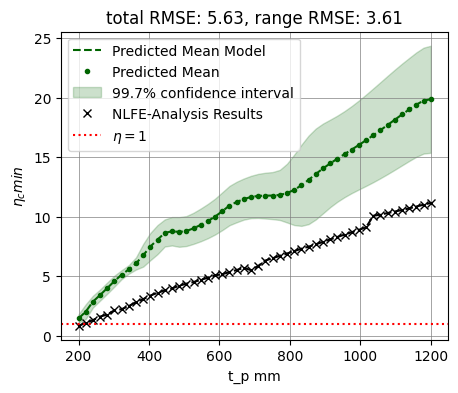

In [108]:
from plotting import single_para_strudy_perf

variable='t_p'
unit='mm'
x=np.array(x_data_1d[variable]).reshape(-1,1)
y_pred=mean_values.reshape(-1,1)
y_true=y_tensor_1d.data.numpy()
y_std=std_values.reshape(-1,1)

single_para_strudy_perf(x, y_pred, y_true, y_std, variable=variable, unit=unit, rmse=rmse.item(),rmse_range=rmse_range.item())

In [109]:
# x=torch.unsqueeze(x_tensor_1d[:, 2], dim=1).data.numpy()
# y_pred=mean_values.reshape(-1,1)
# y_true=y_tensor_1d.data.numpy()
# y_std=std_values.reshape(-1,1)

# plt.figure(figsize=(5,4))
# plt.plot(x,y_pred, linestyle='--',color='darkgreen',lw=1.5,label='Predicted Mean Model')
# plt.plot(x,y_pred, '.',color='darkgreen',markersize=6,label='Predicted Mean')
# plt.fill_between(x.flatten(),y_pred.flatten()-3.0*y_std.flatten(),y_pred.flatten()+3.0*y_std.flatten(),alpha=0.2,color='darkgreen',label='99.7% confidence interval')
# #plt.fill_between(x_tensor_1d.data.numpy().T[2],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='darkgreen',label='99.7% confidence interval')
# #plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
# plt.plot(x,y_true,linestyle='--',color='black',lw=1.5)
# plt.plot(x,y_true,'x',color='black',markersize=6,label='NLFE-Analysis Results')

# # Add a red dotted line at y=1
# plt.axhline(y=1, color='r', linestyle=':', label='$\eta = 1$')
# # plt.plot(x_tensor.data.numpy(),clean_target(x_tensor).data.numpy(),color='green',markersize=4,label='Target function')
# plt.ylim((0,20))
# plt.grid(color='gray', linestyle='-', linewidth=0.5) 
# plt.legend()
# plt.xlabel('t_p [mm]')
# plt.title('total RMSE: {:.2f}, range RMSE: {:.2f}'.format(rmse.item(),rmse_range.item()))
# plt.ylabel('$\eta_{c} min$')

### Example implementation

In [64]:
x = torch.linspace(-2, 2, 500)
y = x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)


In [65]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=1000),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1),
)


In [66]:
mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)


In [67]:
for step in range(2000):
    pre = model(x)
    mse = mse_loss(pre, y)
    kl = kl_loss(model)
    cost = mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))


- MSE : 1.10, KL : 11.09


In [68]:
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

In [69]:
models_result = np.array([model(x_test).data.numpy() for k in range(10000)])
models_result = models_result[:,:,0]    
models_result = models_result.T
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

Text(0, 0.5, 'y')

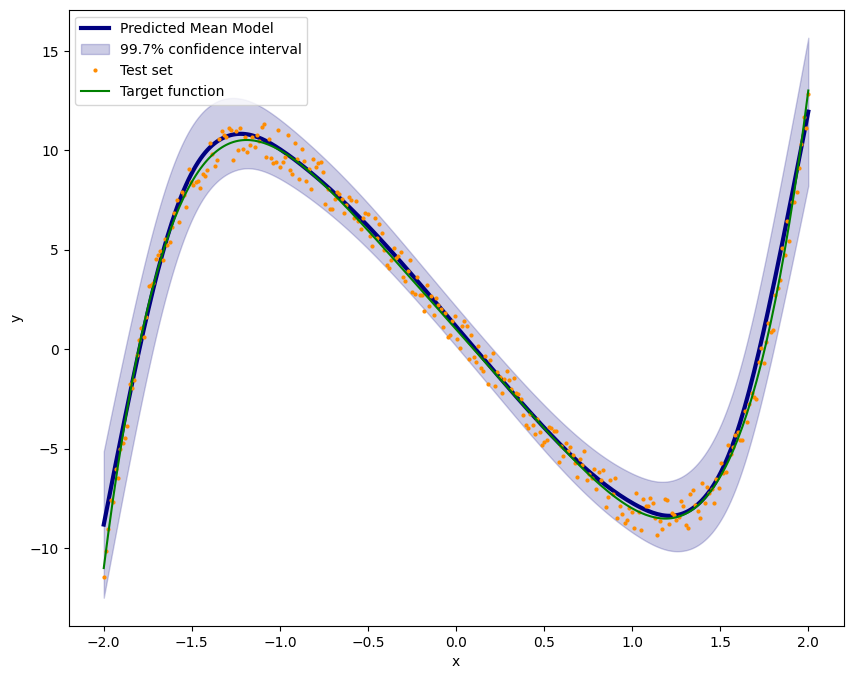

In [70]:
plt.figure(figsize=(10,8))
plt.plot(x_test.data.numpy(),mean_values,color='navy',lw=3,label='Predicted Mean Model')
plt.fill_between(x_test.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
#plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
plt.plot(x_test.data.numpy(),y_test.data.numpy(),'.',color='darkorange',markersize=4,label='Test set')
plt.plot(x_test.data.numpy(),clean_target(x_test).data.numpy(),color='green',markersize=4,label='Target function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# BNN implementation acc. To source 1
https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/DL2/Bayesian_Neural_Networks/dl2_bnn_tut1_students_with_answers.html

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample
import torch.nn as nn

In [ ]:
df=pd.read_csv("TestData\\800_CFB_xy.csv")
df

In [ ]:
x_names = ['L', 'b1',  't_p', 't_w', 'h_w']
y_names=['eta_min_c']

x_data=df[x_names]
x_tensor = torch.tensor(x_data.values).float().squeeze()
y_data=df[y_names]
y_tensor = torch.tensor(y_data.values).float().squeeze()
y_tensor

In [6]:
# #import and clean data
# x_names = ['L', 'b1',  't_p', 't_w', 'h_w',  'fcc', 'fsy', 'fsu', 'esu', 'd1_plate']
# #x_names=['L']
# y_names=['sf3']
# data=pd.concat([pd.read_csv("TestData\\5_CFBSamples.csv")[x_names], pd.read_csv("TestData\\SumRes_5.csv")[y_names]], axis=1)
# data=data[data['sf3']<100]
# #print(data.head())
# data.dropna(axis=0,inplace=True)
# x_data=data[x_names]
# x_tensor = torch.tensor(x_data.values).float().squeeze()
# y_data=data[y_names]
# y_tensor = torch.tensor(y_data.values).float().squeeze()
# # x_tensor[x_tensor.isnan()=='None']
# # x_tensor[0].type()
# print(data.head())

In [7]:
df['eta_min_c'].describe()

count    8001.000000
mean       15.079634
std        27.262112
min         0.000000
25%         0.000000
50%         4.209804
75%        15.477429
max       269.127526
Name: eta_min_c, dtype: float64

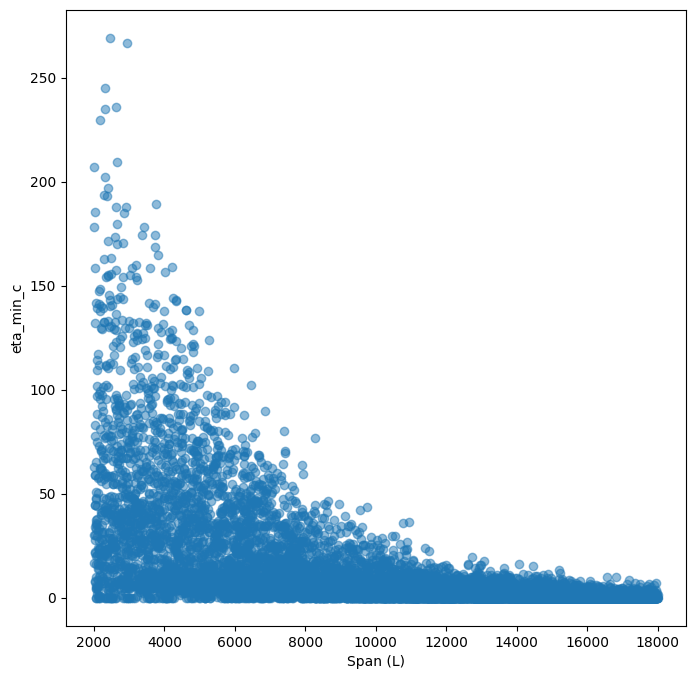

In [9]:
# Plot true vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(x_data['L'], y_data, alpha=0.5)
plt.xlabel('Span (L)')
plt.ylabel('eta_min_c')
# plt.title('True vs Predicted Y Values')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Perfect predictions line
plt.show()

In [10]:
# train, test split

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)
#x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)
print(x_train.shape)

print(x_train)
print(y_train)

torch.Size([6400, 5])
tensor([[ 4859.7729,  6306.4941,   897.4999,   436.2490,  4011.0386],
        [ 4358.8110,  8561.1074,   974.6630,   571.1037,  4524.8252],
        [ 3687.0498, 15295.9443,   500.5158,  1190.8981,  4822.6636],
        ...,
        [15804.3467, 18942.7617,   702.2180,  1041.2847,  4991.1489],
        [ 8262.1660, 10716.0693,   337.2525,  1119.7019,  2722.0759],
        [ 2575.2234,  6967.8379,   946.5286,   898.9583,  4197.2207]])
tensor([12.0225, 26.3039, 62.0504,  ...,  2.7834,  2.3306, 45.0350])


In [11]:
from sklearn.preprocessing import MinMaxScaler
import torch

# Convert tensors to numpy arrays
x_train_np = x_train.numpy()
x_val_np = x_val.numpy()

# Initialize the MinMaxScaler and fit it on the training data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_np)

# Scale the validation data using the same scaler
x_val_scaled = scaler.transform(x_val_np)

# Convert the scaled arrays back to tensors
x_train = torch.tensor(x_train_scaled, dtype=torch.float32)
x_val = torch.tensor(x_val_scaled, dtype=torch.float32)

In [12]:
mean = x_train.mean(dim=0)
print(mean)
std = x_train.std(dim=0)
print(std)
mean = y_train.mean(dim=0)
print(mean)
std = y_train.std(dim=0)
print(std)

tensor([0.4963, 0.4984, 0.4989, 0.4953, 0.5000])
tensor([0.2890, 0.2865, 0.2890, 0.2885, 0.2881])
tensor(14.9289)
tensor(27.1905)


In [13]:
# # Normalisation

# mean = x_train.mean(dim=0)
# std = x_train.std(dim=0)

# x_train_normalized = (x_train - mean) / std
# x_val_normalized = (x_val - mean) / std

# # Handling potential division by zero if a feature has constant value (std = 0)
# x_train_normalized[torch.isnan(x_train_normalized)] = 0
# x_val_normalized[torch.isnan(x_val_normalized)] = 0

In [14]:
class BNN(PyroModule):
    def __init__(self, in_dim=1, out_dim=1, hid_dim=10, n_hid_layers=5, prior_scale=5.):
        super().__init__()

        self.activation = nn.Tanh()  # could also be ReLU or LeakyReLU
        assert in_dim > 0 and out_dim > 0 and hid_dim > 0 and n_hid_layers > 0  # make sure the dimensions are valid

        # Define the layer sizes and the PyroModule layer list
        self.layer_sizes = [in_dim] + n_hid_layers * [hid_dim] + [out_dim]
        layer_list = [PyroModule[nn.Linear](self.layer_sizes[idx - 1], self.layer_sizes[idx]) for idx in
                      range(1, len(self.layer_sizes))]
        self.layers = PyroModule[torch.nn.ModuleList](layer_list)

        for layer_idx, layer in enumerate(self.layers):
            layer.weight = PyroSample(dist.Normal(0., prior_scale * np.sqrt(2 / self.layer_sizes[layer_idx])).expand(
                [self.layer_sizes[layer_idx + 1], self.layer_sizes[layer_idx]]).to_event(2))
            layer.bias = PyroSample(dist.Normal(0., prior_scale).expand([self.layer_sizes[layer_idx + 1]]).to_event(1))

    def forward(self, x, y=None):
        # x = x.reshape(-1, 1)
        x = self.activation(self.layers[0](x))  # input --> hidden
        for layer in self.layers[1:-1]:
            x = self.activation(layer(x))  # hidden --> hidden
        mu = self.layers[-1](x).squeeze()  # hidden --> output
        sigma = pyro.sample("sigma", dist.Gamma(.5, 1))  # infer the response noise

        # print("mu shape:", mu.shape)
        # print("sigma shape:", sigma.shape)
        # print("y shape:", y.shape)
        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs", dist.Normal(mu, sigma * sigma), obs=y)

        
        return mu

In [15]:
x_train.shape

torch.Size([6400, 5])

In [17]:
from pyro.infer import SVI, Trace_ELBO
from pyro.infer.autoguide import AutoDiagonalNormal
from tqdm.auto import trange
pyro.clear_param_store()

model = BNN(in_dim=5, out_dim=1, hid_dim=20, n_hid_layers=10, prior_scale=5.)
mean_field_guide = AutoDiagonalNormal(model)
optimizer = pyro.optim.Adam({"lr": 0.01})

svi = SVI(model, mean_field_guide, optimizer, loss=Trace_ELBO())
pyro.clear_param_store()

num_epochs = 2500
progress_bar = trange(num_epochs)


losses = []
for epoch in progress_bar:
    loss = svi.step(x_train, y_train)
    avg_loss = loss / x_train.shape[0]
    losses.append(avg_loss)
    progress_bar.set_postfix(loss=f"{loss / x_train.shape[0]:.3f}")

  0%|          | 0/2500 [00:00<?, ?it/s]

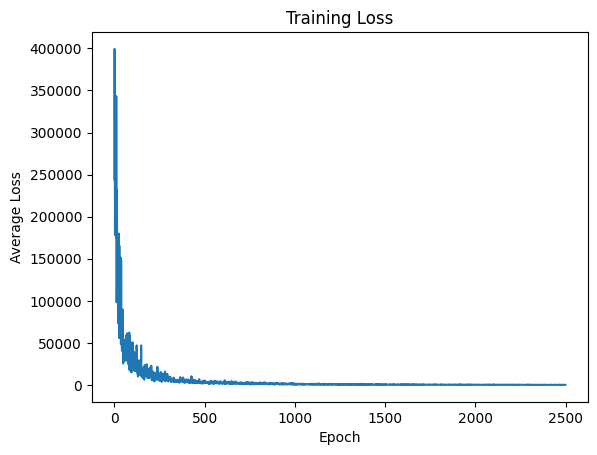

In [18]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.show()

In [19]:
from pyro.infer import Predictive

predictive = Predictive(model, guide=mean_field_guide, num_samples=500)
preds = predictive(x_val)

In [20]:
preds['sigma']

tensor([[1.1387],
        [1.1396],
        [1.0537],
        [1.0545],
        [0.9933],
        [0.9864],
        [1.1812],
        [1.0925],
        [1.0206],
        [1.0973],
        [1.0593],
        [1.0245],
        [1.1559],
        [1.0641],
        [0.9827],
        [1.1196],
        [1.1723],
        [1.1153],
        [1.0074],
        [0.9714],
        [1.1682],
        [1.0342],
        [1.1417],
        [1.1538],
        [1.1378],
        [1.1198],
        [1.1077],
        [1.0728],
        [1.0587],
        [1.1470],
        [1.0126],
        [1.1252],
        [1.0757],
        [1.0677],
        [1.0231],
        [1.0941],
        [1.1728],
        [1.0911],
        [1.1290],
        [1.1591],
        [1.0608],
        [1.0037],
        [1.1054],
        [1.1662],
        [1.1060],
        [0.9675],
        [1.0544],
        [1.1336],
        [1.1854],
        [1.1258],
        [1.1037],
        [1.1795],
        [1.0055],
        [1.0497],
        [1.1803],
        [1

In [21]:
predicted_y_mean = preds['obs'].mean(0)
predicted_y_mean

tensor([ 1.5069,  1.6047,  1.3319,  ...,  4.5621, 11.8945,  1.2790])

In [23]:
# y_pred = preds['obs'].T.detach().numpy().mean(axis=1)
# print(y_pred)
y_pred= preds['obs'][0]
print(y_pred)

tensor([ 3.0927,  3.6550,  4.2311,  ...,  4.8859, 16.8374,  6.1470])


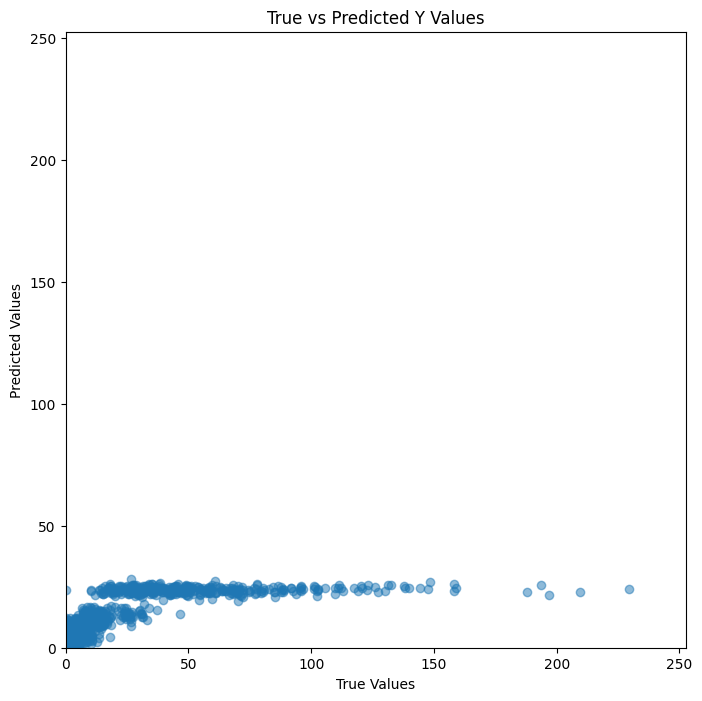

In [24]:
# Plot true vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred, alpha=0.5)
max_value = max(y_val.max(), y_pred.max())
min_value = min(y_val.min(), y_pred.min())
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Y Values')
plt.xlim(-0.1 * min_value, 1.1 * max_value)
plt.ylim(-0.1 * min_value, 1.1 * max_value)
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Perfect predictions line
plt.show()

In [28]:
#Assuming y_val and y_pred are PyTorch tensors
# Calculate the squared differences
squared_diff = (y_val - y_pred) ** 2

# Calculate the mean of squared differences
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE
rmse = torch.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse.item())

Root Mean Squared Error (RMSE): 22.71416473388672


In [26]:
def plot_predictions(preds):
    y_pred = preds['obs'].T.detach().numpy().mean(axis=1)
    y_std = preds['obs'].T.detach().numpy().std(axis=1)

    fig, ax = plt.subplots(figsize=(10, 5))
    # xlims = [-0.5, 1.5]
    # ylims = [-1.5, 2.5]
    # plt.xlim(xlims)
    # plt.ylim(ylims)
    plt.xlabel("X", fontsize=30)
    plt.ylabel("Y", fontsize=30)

    #ax.plot(x_true, y_true, 'b-', linewidth=3, label="true function")
    ax.plot(x_train[:, 0] , y_train, 'ko', markersize=4, label="observations")
    ax.plot(x_train[:, 0], y_train, 'ko', markersize=3)
    ax.plot(x_val[:, 0], y_pred, '-', linewidth=3, color="#408765", label="predictive mean")
    ax.fill_between(x_val[:, 0], y_pred - 2 * y_std, y_pred + 2 * y_std, alpha=0.6, color='#86cfac', zorder=5)

    plt.legend(loc=4, fontsize=15, frameon=False)

In [42]:
x_train[:, 0]

tensor([0.3251, 0.5205, 0.1083,  ..., 0.3775, 0.6774, 0.4823])

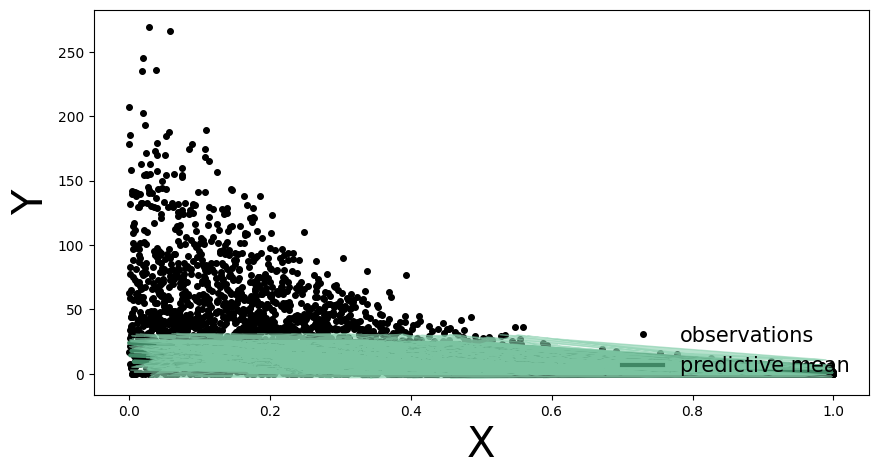

In [27]:
plot_predictions(preds)